# Physiologically based pharmacokinetic (PBPK)
Physiologically based pharmacokinetic (PBPK) models are mathematical models that can predict how a drug is absorbed, distributed, metabolized, and excreted by the body. PBPK models are built to be physiologically meaningful and incorporate information about the physiology of the body and the physical chemistry of the drug.

These models are structured to represent the body as a series of interconnected compartments that correspond to actual body organs and tissues (e.g., liver, kidneys, heart, blood, etc.). Each compartment can have unique characteristics such as volume, blood flow rate, and specific enzyme or transporter levels.

The inputs for a PBPK model include parameters like the physicochemical properties of the drug (e.g., partition coefficients, molecular weight, pKa), its dose and route of administration, and specific information about the physiology of the individual (e.g., body weight, age, sex, organ function, enzyme activity).

These models are quite complex, but they are valuable because they can be used to simulate and predict the behavior of drugs in the body under various conditions. This allows researchers to anticipate potential issues with drug-drug interactions, pharmacokinetics in different populations (e.g., children, the elderly, or patients with specific organ impairments), or under various dosing scenarios.

In other words, PBPK models serve as a tool that helps scientists understand how a drug will behave in the body before it's administered, thereby helping to optimize dosing regimens, predict potential side effects, and generally improve the safety and effectiveness of drug therapy.

Within this tutorial we will work with a simple PBPK model to study the pharmacokinetics of caffeine. Pharmacokinetics refers to how a drug is absorbed, distributed, metabolized, and excreted by the body. Here are the key points about the pharmacokinetics of caffeine:

1. **Absorption**: Caffeine is rapidly and almost completely absorbed from the gastrointestinal tract after oral ingestion, with peak plasma concentrations typically reached within 30 minutes to 2 hours.

2. **Distribution**: Caffeine is distributed throughout all body tissues and fluids, including the brain, and it crosses the placenta. It is highly water and lipid soluble, enabling its wide distribution throughout the body.

3. **Metabolism**: Caffeine is primarily metabolized in the liver by the cytochrome P450 oxidase enzyme system, specifically CYP1A2, into three dimethylxanthines, each having its own effects: paraxanthine (increases lipolysis), theobromine (dilates blood vessels and increases urine volume), and theophylline (relaxes smooth muscles of the bronchi, coronary arteries, and is responsible for caffeine's diuretic effect). The rate of caffeine metabolism can be affected by various factors such as genetic factors, liver function, and concurrent medications or substances that induce or inhibit CYP1A2.

4. **Excretion**: The metabolites of caffeine are excreted in the urine. Less than 1% of consumed caffeine is excreted unchanged in the urine. 

5. **Half-life**: The half-life of caffeine in the human body is typically in the range of 3 to 5 hours. This can be influenced by factors such as age, liver function, pregnancy, and the level of enzymes in the liver. For example, in newborns, caffeine has a much longer half-life, and during pregnancy, particularly in the third trimester, caffeine clearance is significantly decreased.

Please note that while this is a general guide, individual responses to caffeine can vary based on genetics, body mass, age, medication interactions, and tolerance levels.

![Caffeine Motivation](11_pbpk_tutorial_motivation.png)

For questions contact konigmatt@googlemail.com. The latest version of the resources are available from https://github.com/matthiaskoenig/pkpd-course/releases

## Install requirements
This tutorial works in a python environment with the following packages
```
numpy
scipy
matplotlib
pandas
libroadrunner
```

The packages can be installed via
```
pip install numpy scipy matplotlib pandas libroadrunner
```
or in `conda` via
```
conda install numpy scipy matplotlib pandas libroadrunner
```

The only additional requirement for this tutorial is `libroadrunner`

## Download the model
The caffeine model can be downloaded from https://github.com/matthiaskoenig/pkpd-course/raw/develop/notebooks/models/caffeine_body_flat.xml.
The model must be located in the same folder as the scripts.

In [1]:
# some magic (please ignore in spyder, only important for notebooks)
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import roadrunner

In [3]:
# general imports for ode integration
from pathlib import Path
import numpy as np
import pandas as pd
import roadrunner
from matplotlib import pylab as plt
from pprint import pprint

# global settings for plots (optional)
plt.rcParams.update({
        'axes.labelsize': 'large', 
        'axes.labelweight': 'bold',
        'axes.titlesize': 'large',
        'axes.titleweight': 'bold',
        'legend.fontsize': 'small',
        'xtick.labelsize': 'large',
        'ytick.labelsize': 'large',
    })

# caffeine model
caffeine_sbml = str(Path(".").parent / "caffeine_body_flat.xml")


def simulate(r, start: float=0, end: float=10, steps: int=200, reset:bool=True) -> pd.DataFrame:
    """ Simulate given roadrunner model.

    :param r: roadrunner model
    :param start: start time
    :param end: end time
    :param steps: simulation steps
    :param reset: resets the model after simulation
    :return:
    """
    if reset:
        r.reset()
    s = r.simulate(start=start, end=end, steps=steps)
    return pd.DataFrame(s, columns=s.colnames)

## Physiologically based pharmacokinetic (PBPK) model for caffeine
The model describes the clearance of caffeine by the liver in humans.

* Caffeine and the primary metabolite paraxanthine are removed from the blood by hepatic or renal clearance.
* Caffeine can be administered in the model either by intravenous injection or by oral dose.

This tutorial demonstrates some simple use cases and analysis of the model.

![Fig.1 Caffeine PKPD Model](11_pbpk_tutorial_caffeine_pkpd.png)

## Load the caffeine model

In [4]:
# from helpers import *
print(caffeine_sbml)

# load the model
r = roadrunner.RoadRunner(caffeine_sbml)
# set variables in result
r.timeCourseSelections = ["time"] + r.model.getFloatingSpeciesIds() + r.model.getGlobalParameterIds()
# pprint(r.timeCourseSelections)

caffeine_body_flat.xml


The model is an SBML model and you can view the corresponding file and HTML report. This gives a good overview of the contents of the model. This report can be generated from https://sbml4humans.de

## Example simulation
We now simulate a 100 [mg] oral dose (p.o) of caffeine. 
In a first step we perform this simulation and look at some state variables of the model.

The model time is in [h]. The simulation result is a pandas DataFrame which can easily be accessed.

In [5]:
# reset model to initial state
r.resetToOrigin()

# set the oral dose
r["init(PODOSE_caf)"] = 100  # [mg]

# set parameters
r["BW"] = 100  # [kg] bodyweight
# r["LI__CAF2PX_Vmax"] = 2E-3  # [mmole/min/l] rate caf -> px
# r["KI__PXEX_f"] = 5  # [-] renal clearance paraxantine

# simulate the model for 24 [hr], model time is in [min]
s = simulate(r, start=0, end=24*60, steps=1200)  # [min]

# show the resulting DataFrame
print(s.head())

   time  Cgu_plasma_caf  Cki_plasma_caf  Cli_plasma_caf  Clu_plasma_caf  \
0   0.0        0.000000    0.000000e+00        0.000000    0.000000e+00   
1   1.2        0.000019    3.142602e-08        0.000003    1.359226e-07   
2   2.4        0.000058    4.265750e-07        0.000017    1.097020e-06   
3   3.6        0.000102    1.360261e-06        0.000038    2.943392e-06   
4   4.8        0.000144    2.659598e-06        0.000062    5.310823e-06   

   Cre_plasma_caf   Car_caf   Cve_caf   Cpo_caf   Chv_caf  ...    Mve_px  \
0    0.000000e+00  0.000000  0.000000  0.000000  0.000000  ...  0.000000   
1    1.867982e-07  0.000013  0.000043  0.000024  0.000006  ...  0.000297   
2    4.140970e-06  0.000127  0.000310  0.000074  0.000030  ...  0.002833   
3    1.934535e-05  0.000358  0.000802  0.000130  0.000069  ...  0.008538   
4    5.119269e-05  0.000661  0.001422  0.000185  0.000112  ...  0.016942   

         Apo_px   Cpo_free_px    Xpo_px    Mpo_px        Ahv_px  Chv_free_px  \
0  0.000000e

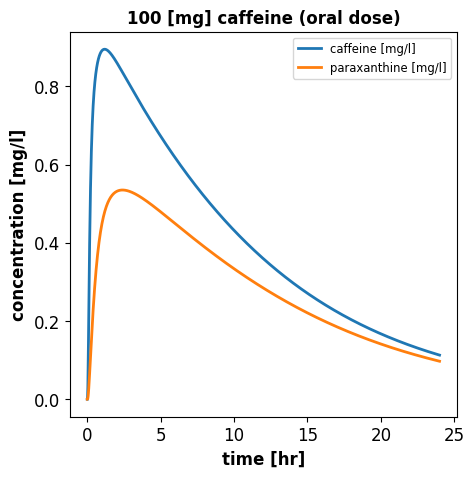

In [6]:
# plot venous caffeine & paraxanthine concentrations against time
f1, ax1 = plt.subplots(1, 1, figsize=(5, 5))

time_hr = s.time/60  # [min] -> [hr]

# caffeine concentration, venous blood
ax1.plot(time_hr, s.Mve_caf, linewidth=2, label="caffeine [mg/l]", color="tab:blue") 
# paraxanthine concentration, venous blood
ax1.plot(time_hr, s.Mve_px, linewidth=2, label="paraxanthine [mg/l]", color="tab:orange")  
ax1.set_title('100 [mg] caffeine (oral dose)')
ax1.set_ylabel('concentration [mg/l]')
ax1.set_xlabel('time [hr]')
ax1.legend()
plt.show()

## Compare amounts in different organs
In the following we compare the amount of caffeine in the different organs.
For this we select all the columns in the solution which belong the amount of caffeine.

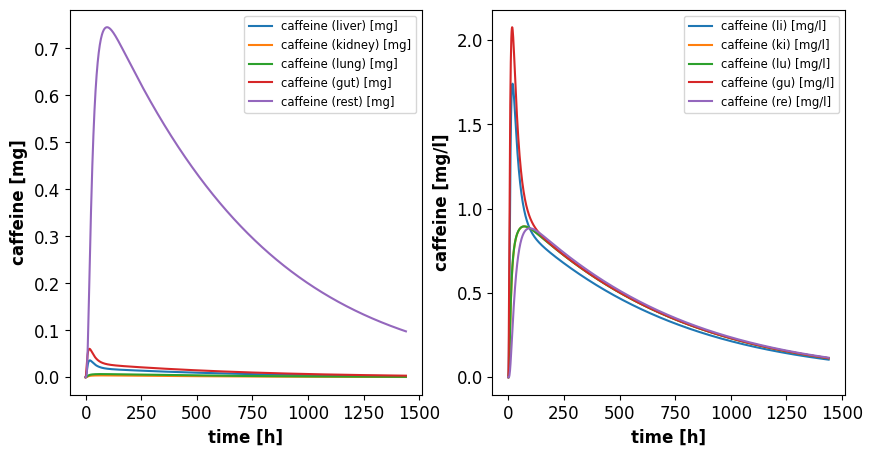

In [7]:
# plot caffeine and paraxanthine amounts
f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
axes = (ax1, ax2)
organs = {
    "li": "liver", 
    "ki": "kidney",
    "lu": "lung", 
    "gu": "gut", 
    "re": "rest",
}

for organ, name in organs.items():
    sid = f"X{organ}_plasma_caf"
    label = f"caffeine ({name}) [mg]"
    ax1.plot(s.time, s[sid], label=label)    
    
    sid = f"M{organ}_plasma_caf"
    label = f"caffeine ({organ}) [mg/l]"
    ax2.plot(s.time, s[sid], label=label)    


ax1.set_ylabel('caffeine [mg]')
ax2.set_ylabel('caffeine [mg/l]')
for ax in axes:
    ax.set_xlabel('time [h]')
    ax.legend()

plt.show()

## Plot the organ volumes
In the following we plot the organ volumes by querying the model. Model variables and parameters are available via the dot syntax (`.`) or the bracket access (`[]`).

In [8]:
for oid in organs:
    vid = f"V{oid}"
    print(f"V{oid} = {r[vid]} [l]")

Vli = 2.1 [l]
Vki = 0.44 [l]
Vlu = 0.76 [l]
Vgu = 2.97 [l]
Vre = 86.02000000000001 [l]


In [9]:
print("relative volume:", r.FVli)
print("relative perfusion:", r.FQh)

relative volume: 0.021
relative perfusion: 0.215


## Stepwise increase of the caffeine dose
Now we see what happens if we drink more coffee every day

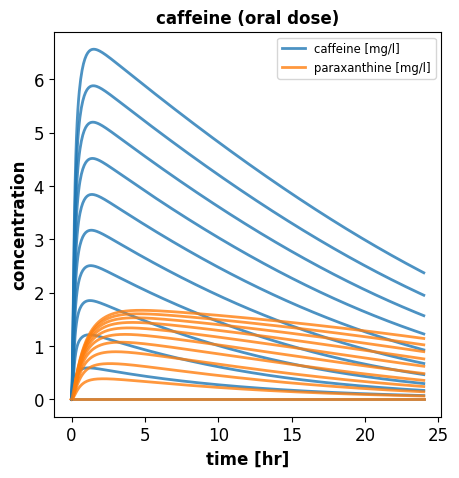

In [10]:
doses = np.linspace(0, 500, num=11)
results = []

for dose in doses:
    # reset model to initial state
    r.reset()
    
    # set the oral dose
    r['init(PODOSE_caf)'] = dose  # [mg]

    # simulate the model for 24[h]
    s = simulate(r, start=0, end=24*60, steps=500)
    results.append(s)

# plot venous caffeine & paraxanthine against time
f1, ax1 = plt.subplots(1, 1, figsize=(5, 5))
for k, s in enumerate(results):
    time_hr = s.time/60
    if k == 1:
        label = "caffeine [mg/l]"
    else:
        label = "__nolabel__"
    ax1.plot(time_hr, s.Mve_caf, linewidth=2, color="tab:blue", label=label, alpha=0.8)
    if k == 1:
        label = "paraxanthine [mg/l]"
    else:
        label = "__nolabel__"
    ax1.plot(time_hr, s.Mve_px, linewidth=2, color="tab:orange", label=label, alpha=0.8)
ax1.set_title('caffeine (oral dose)')
ax1.set_ylabel('concentration')
ax1.set_xlabel('time [hr]')
ax1.legend()
plt.show()

# Exercises
## E1 Your caffeine level
The first exercise is to calculate the timecourse of the expected venous caffeine level after you drink some caffeinated beverage. To estimate your oral dose of caffeine you can estimate the caffeine content from the following chart

![Fig.2 Caffeine Content of Beverages](11_pbpk_tutorial_caffeine_levels.jpg)

The oral dose is defined in the model via parameter `r['init(PODOSE_caf)'] = 100` [mg]. In addition you can also adjust the bodyweight to get a more realistic estimation via the parameter `r['BW'] = 70` [kg].

* What would be your level of caffeine now, if you had two cups of coffee for breakfast this morning?
* How would your time course and level of caffeine look if you would take the same amount of caffeine intravenously (I.V)? (Hint: you have to set the set the i.v. dose via `r['init(IVDOSE_caf)'] = 100`)
* What is the peak time of caffeine in venous blood? What is the peak concentration?

## E2 Interindividual variability
We saw that there is a large variability in caffeine kinetics in the population. Depending on if you are a fast or slow metabolizer of caffeine the timecourses can look very different. In E1 you calculated the mean timecourse for the population. Now we will look at the interindividual differences.

Your caffeine clearance by the liver depends on the activity of CYP1A2 in the liver, the main enzyme metabolizing caffeine. The activity is defined via the liver parameter (`r['LI__cyp1a2'] = 1` [dimensionless]).

* How would your time course / level of caffeine change if you are a slow metabolizer (small apparent clearance), or if you are a fast metabolizer (large apperent clearance)?
* Simulate the effect of lifestyle changes on your caffeine clearance via adjusting the caffeine clearance accordingly. For instance simulate changes in your coffee intake or smoking habit. An overview over the changes in apparent clearance are given in Tab.1. 
* How would your caffeine timecourse change if you smoke >20 cigarettes per day and drink 1 liter of coffee (the effects are additive) compared to being abstinent?
* Also the bodyweight has a strong influence on the distribution of caffeine. What happens when setting your body weight? (`r.BW = 75` [kg]) 

![Tab.1 Lifestyle Effects](11_pbpk_tutorial_Tantcheva-Poor1999_Tab4.png)